In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
n_measurements = 7

velocities = np.zeros((n_measurements, 10))

for i in range(n_measurements):
    for r_i, r in enumerate(np.arange(0.1, 1.01, 0.1)):
        data = pd.read_csv(f'measurements_{i}/rate_{round(r, 1)}.csv')
        data_in_range = data[data['time'] > 20]
        
        displacement = data_in_range.groupby('pedestrian_id').agg({'x': 'diff', 'y': 'diff'})
        velocities[i, r_i] = np.mean(np.sqrt(displacement['x']**2 + displacement['y']**2) / 0.1)

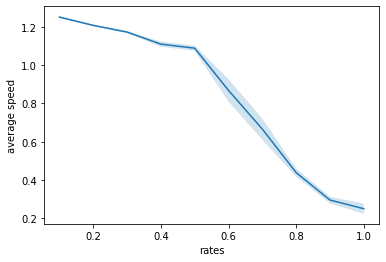

In [40]:
mean = velocities.mean(axis=0)
std = velocities.std(axis=0) / np.sqrt(n_measurements)
plt.plot(np.arange(0.1, 1.01, 0.1), mean)
plt.fill_between(np.arange(0.1, 1.01, 0.1), mean - std, mean + std, alpha=0.2)
plt.ylabel('average speed')
plt.xlabel('rates')
plt.show()

In [41]:
velocities

array([[1.24782374, 1.20957978, 1.19626557, 1.09228043, 1.12919739,
        0.80463723, 0.516716  , 0.43819106, 0.24188676, 0.37326327],
       [1.26765827, 1.19974311, 1.18468342, 1.15349792, 1.11405313,
        1.06088607, 0.62669384, 0.54511258, 0.27622983, 0.32596374],
       [1.2450153 , 1.22409247, 1.15899404, 1.12763437, 1.06178378,
        0.9486292 , 0.56137026, 0.3640211 , 0.233406  , 0.22888251],
       [1.2358106 , 1.21315463, 1.17050689, 1.06185917, 1.14869591,
        0.98775125, 0.92215973, 0.41415668, 0.34732347, 0.27049905],
       [1.24007372, 1.19045614, 1.18535946, 1.0631515 , 1.05064184,
        0.9503964 , 0.85963256, 0.41227757, 0.28435582, 0.19510456],
       [1.26734749, 1.22567188, 1.15491196, 1.14321014, 1.06628792,
        0.57325801, 0.62450718, 0.40055257, 0.35772109, 0.16793519],
       [1.25993247, 1.19851111, 1.16462071, 1.13174177, 1.05486607,
        0.75376975, 0.55033156, 0.49340682, 0.32110159, 0.18210165]])